# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from dotenv import load_dotenv
load_dotenv(r"C:\Users\Jean-Pierre Koudifo\Dropbox (Global Language)\My PC (LAPTOP-BCAOEDAN)\Desktop\My API\.env")

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Jean-Pierre
[nltk_data]     Koudifo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")


In [38]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [79]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",sort_by='relevancy',
    
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7297


{'source': {'id': 'bbc-news', 'name': 'BBC News'},
 'author': 'https://www.facebook.com/bbcnews',
 'title': "Indian PM Modi's Twitter hacked with bitcoin tweet",
 'description': "The Indian prime minister's account had a message stating that bitcoin would be distributed to citizens.",
 'url': 'https://www.bbc.co.uk/news/world-asia-india-59627124',
 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/5998/production/_122063922_mediaitem122063921.jpg',
 'publishedAt': '2021-12-12T10:59:57Z',
 'content': "Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi's Twitter account was hacked with a message saying India ha… [+854 chars]"}

In [81]:
# Fetch the Ethereum news articles
ethereum_headlines= newsapi.get_everything(
    q="Ethereum",
    language="en", sort_by='relevancy',
       
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")
ethereum_headlines["articles"][0]

Total articles about Ethereum: 3099


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Jacob Kastrenakes',
 'title': 'Almost buying a copy of the Constitution is easy, but giving the money back is hard',
 'description': 'ConstitutionDAO has refunded more than half of the contributions to its failed attempt to buy a rare copy of the US Constitution at auction. But high gas fees have cost more than $1.2 million so far.',
 'url': 'https://www.theverge.com/2021/11/24/22800995/constitutiondao-refund-progress-steep-gas-fees-cryptocurrency',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/saEc_B14EZIKIVPp0q8KT-zxPlU=/0x125:1746x1039/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23022988/constdao.jpg',
 'publishedAt': '2021-11-24T23:00:34Z',
 'content': 'More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars]'}

In [83]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head(10)

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ..."
5,0.0000,0.000,0.000,1.000,White Castle double cheeseburger.Erin McDowell...
6,0.4939,0.119,0.000,0.881,"Nicholas Merten , an expert in cryptography, p..."
7,0.3818,0.080,0.000,0.920,Regal movie theater.Shutterstock\r\nMovie-thea...
8,0.3612,0.070,0.000,0.930,While people around the world still searched f...
9,0.4019,0.155,0.115,0.729,The wait is finally over. After a year-long de...


In [84]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head(10)

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ..."
5,0.0000,0.000,0.000,1.000,White Castle double cheeseburger.Erin McDowell...
6,0.4939,0.119,0.000,0.881,"Nicholas Merten , an expert in cryptography, p..."
7,0.3818,0.080,0.000,0.920,Regal movie theater.Shutterstock\r\nMovie-thea...
8,0.3612,0.070,0.000,0.930,While people around the world still searched f...
9,0.4019,0.155,0.115,0.729,The wait is finally over. After a year-long de...


In [88]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.170450,0.060950,0.025450,0.913550
std,0.293212,0.055076,0.041952,0.075034
min,-0.584900,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.872500
50%,0.176350,0.072000,0.000000,0.923500
75%,0.386825,0.084750,0.052500,0.967750
max,0.654200,0.178000,0.115000,1.000000


In [89]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.170450,0.060950,0.025450,0.913550
std,0.293212,0.055076,0.041952,0.075034
min,-0.584900,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.872500
50%,0.176350,0.072000,0.000000,0.923500
75%,0.386825,0.084750,0.052500,0.967750
max,0.654200,0.178000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [45]:
# Question responses on the Summarary Read me. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jean-Pierre
[nltk_data]     Koudifo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
# Instantiate the lemmatizer
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Expand the d||efault stopwords list if necessary
sw = set(stopwords.words('english'))

In [145]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
   
    return lem

tokenizer(bitcoin_df.iloc[0]['Text'])


['more',
 'than',
 'million',
 'ha',
 'already',
 'been',
 'spent',
 'on',
 'gas',
 'feesone',
 'of',
 'remaining',
 'copy',
 'of',
 'the',
 'official',
 'edition',
 'of',
 'the',
 'constitutionimage',
 'sothebysas',
 'of',
 'last',
 'thursday',
 'night',
 'constitutiondao',
 'found',
 'i',
 'char']

In [147]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['Text'].apply(tokenizer)
bitcoin_df

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...,"[more, than, million, ha, already, been, spent..."
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...,"[ethereum, ha, been, on, a, tear, this, year, ..."
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...,"[blockchain, startup, monox, finance, said, on..."
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t...","[on, monday, budweiser, joined, the, nonfungib..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...","[earlier, this, year, nothing, released, a, pa..."
5,0.0000,0.000,0.000,1.000,White Castle double cheeseburger.Erin McDowell...,"[white, castle, double, cheeseburgererin, mcdo..."
6,0.4939,0.119,0.000,0.881,"Nicholas Merten , an expert in cryptography, p...","[nicholas, merten, an, expert, in, cryptograph..."
7,0.3818,0.080,0.000,0.920,Regal movie theater.Shutterstock\r\nMovie-thea...,"[regal, movie, theatershutterstockmovietheater..."
8,0.3612,0.070,0.000,0.930,While people around the world still searched f...,"[while, people, around, the, world, still, sea..."
9,0.4019,0.155,0.115,0.729,The wait is finally over. After a year-long de...,"[the, wait, is, finally, over, after, a, yearl..."


In [148]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['Text'].apply(tokenizer)
ethereum_df

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...,"[more, than, million, ha, already, been, spent..."
1,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...,"[ethereum, ha, been, on, a, tear, this, year, ..."
2,-0.0516,0.074,0.079,0.847,Blockchain startup MonoX Finance said on Wedne...,"[blockchain, startup, monox, finance, said, on..."
3,-0.1531,0.000,0.045,0.955,"On Monday, Budweiser joined the non-fungible t...","[on, monday, budweiser, joined, the, nonfungib..."
4,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...","[earlier, this, year, nothing, released, a, pa..."
5,0.0000,0.000,0.000,1.000,White Castle double cheeseburger.Erin McDowell...,"[white, castle, double, cheeseburgererin, mcdo..."
6,0.4939,0.119,0.000,0.881,"Nicholas Merten , an expert in cryptography, p...","[nicholas, merten, an, expert, in, cryptograph..."
7,0.3818,0.080,0.000,0.920,Regal movie theater.Shutterstock\r\nMovie-thea...,"[regal, movie, theatershutterstockmovietheater..."
8,0.3612,0.070,0.000,0.930,While people around the world still searched f...,"[while, people, around, the, world, still, sea..."
9,0.4019,0.155,0.115,0.729,The wait is finally over. After a year-long de...,"[the, wait, is, finally, over, after, a, yearl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [158]:
from collections import Counter
from nltk import ngrams

In [159]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df)
eth_tokens = get_token(ethereum_df)

In [160]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [166]:
bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('more', 'than'): 2,
 ('than', 'million'): 1,
 ('million', 'ha'): 1,
 ('ha', 'already'): 1,
 ('already', 'been'): 1,
 ('been', 'spent'): 1,
 ('spent', 'on'): 1,
 ('on', 'gas'): 1,
 ('gas', 'feesone'): 1,
 ('feesone', 'of'): 1,
 ('of', 'remaining'): 1,
 ('remaining', 'copy'): 1,
 ('copy', 'of'): 1,
 ('of', 'the'): 4,
 ('the', 'official'): 1,
 ('official', 'edition'): 1,
 ('edition', 'of'): 1,
 ('the', 'constitutionimage'): 1,
 ('constitutionimage', 'sothebysas'): 1,
 ('sothebysas', 'of'): 1,
 ('of', 'last'): 1,
 ('last', 'thursday'): 1,
 ('thursday', 'night'): 1,
 ('night', 'constitutiondao'): 1,
 ('constitutiondao', 'found'): 1,
 ('found', 'i'): 1,
 ('i', 'char'): 1,
 ('char', 'ethereum'): 1,
 ('ethereum', 'ha'): 2,
 ('ha', 'been'): 1,
 ('been', 'on'): 1,
 ('on', 'a'): 1,
 ('a', 'tear'): 1,
 ('tear', 'this'): 1,
 ('this', 'year'): 4,
 ('year', 'it'): 1,
 ('it', 'outperformed'): 1,
 ('outperformed', 'bitcoin'): 1,
 ('bitcoin', 'this'): 1,
 ('year', 'and'): 1,
 ('and', 'ha'): 1,
 ('ha',

In [167]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('more', 'than'): 2,
 ('than', 'million'): 1,
 ('million', 'ha'): 1,
 ('ha', 'already'): 1,
 ('already', 'been'): 1,
 ('been', 'spent'): 1,
 ('spent', 'on'): 1,
 ('on', 'gas'): 1,
 ('gas', 'feesone'): 1,
 ('feesone', 'of'): 1,
 ('of', 'remaining'): 1,
 ('remaining', 'copy'): 1,
 ('copy', 'of'): 1,
 ('of', 'the'): 4,
 ('the', 'official'): 1,
 ('official', 'edition'): 1,
 ('edition', 'of'): 1,
 ('the', 'constitutionimage'): 1,
 ('constitutionimage', 'sothebysas'): 1,
 ('sothebysas', 'of'): 1,
 ('of', 'last'): 1,
 ('last', 'thursday'): 1,
 ('thursday', 'night'): 1,
 ('night', 'constitutiondao'): 1,
 ('constitutiondao', 'found'): 1,
 ('found', 'i'): 1,
 ('i', 'char'): 1,
 ('char', 'ethereum'): 1,
 ('ethereum', 'ha'): 2,
 ('ha', 'been'): 1,
 ('been', 'on'): 1,
 ('on', 'a'): 1,
 ('a', 'tear'): 1,
 ('tear', 'this'): 1,
 ('this', 'year'): 4,
 ('year', 'it'): 1,
 ('it', 'outperformed'): 1,
 ('outperformed', 'bitcoin'): 1,
 ('bitcoin', 'this'): 1,
 ('year', 'and'): 1,
 ('and', 'ha'): 1,
 ('ha',

In [168]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [171]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('the', 27),
 ('of', 20),
 ('char', 19),
 ('a', 17),
 ('in', 11),
 ('on', 10),
 ('for', 10),
 ('it', 9),
 ('and', 9),
 ('this', 7)]

In [172]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('the', 27),
 ('of', 20),
 ('char', 19),
 ('a', 17),
 ('in', 11),
 ('on', 10),
 ('for', 10),
 ('it', 9),
 ('and', 9),
 ('this', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

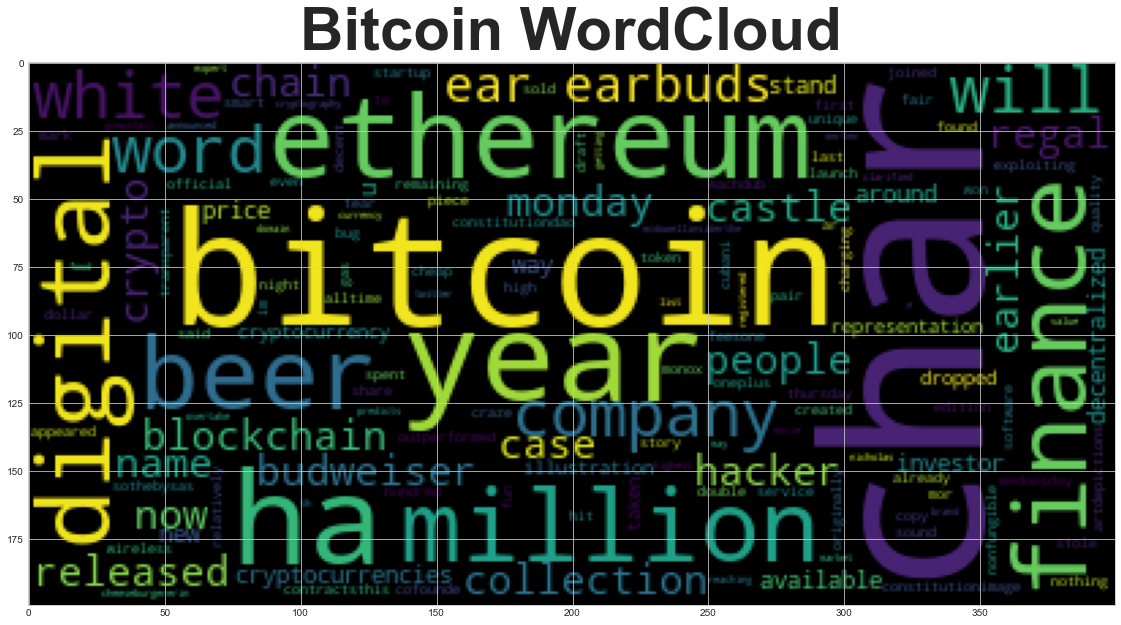

In [179]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin WordCloud", fontsize = 60, fontweight = 'bold')
plt.imshow(wc)

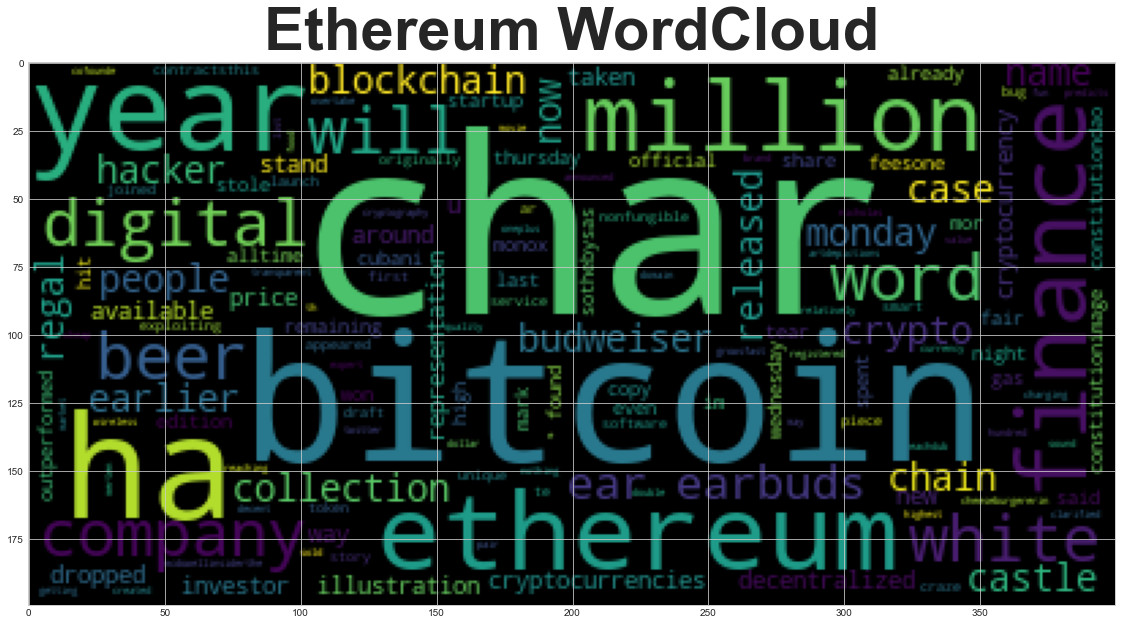

In [181]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum WordCloud", fontsize = 60, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [182]:
import spacy
from spacy import displacy

In [183]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [184]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [186]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df['Text'])
btc_text

'More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars] On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital art\xa0\xa0depictions of beer cans that sold for hundreds of dollars each.\xa0\r\nDub… [+1512 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireles

In [188]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [189]:
# Render the visualization
displacy.render(doc, style='ent')

In [193]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
Earlier this year DATE
99 MONEY
OnePlus ORG
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Nicholas Merten PERSON
May 2018 DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
DeFi GPE
Ethereum ORG
DeFi GPE
The U.S. Captioning Company ORG
the British Institute of Verbatim Reporters ORG
Bitcoin PERSON
Saturday DATE
the weekend DATE
$196 million MONEY
Bitmar GPE
Bi

---

### Ethereum NER

In [187]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df['Text'])
eth_text

'More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars] On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital art\xa0\xa0depictions of beer cans that sold for hundreds of dollars each.\xa0\r\nDub… [+1512 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireles

In [190]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER"

In [191]:
# Render the visualization
displacy.render(doc, style='ent')

In [192]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
Earlier this year DATE
99 MONEY
OnePlus ORG
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Nicholas Merten PERSON
May 2018 DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
DeFi GPE
Ethereum ORG
DeFi GPE
The U.S. Captioning Company ORG
the British Institute of Verbatim Reporters ORG
Bitcoin PERSON
Saturday DATE
the weekend DATE
$196 million MONEY
Bitmar GPE
Bi

---